#### Import Dependencies  

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 150
plt.style.use('ggplot')
np.random.seed(42)
np.set_printoptions(precision=2, linewidth=100)


#### Read Data 

In [2]:
train = pd.read_csv(r"train.csv", lineterminator="\n")
valid = pd.read_csv(r"validation.csv", lineterminator="\n")

X_train = train['X_train'].values[:, np.newaxis]
y_train = train['Y_train\r'].values[:, np.newaxis].T

X_valid = valid['X_validation'].values[:, np.newaxis]
y_valid = valid['Y_validation\r'].values[:, np.newaxis].T


#### Scale Data 

In [3]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train).T
X_valid = scaler.transform(X_valid).T


#### Visualize Raw Data 

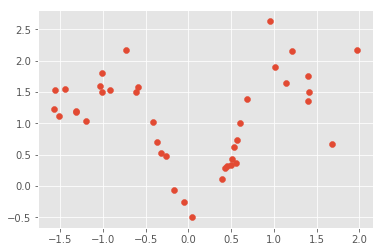

In [4]:
plt.scatter(X_train, y_train);


#### Polynomial Features 

In [5]:
def add_polynomial_features(X, degree):
    ones = np.ones(X.shape[1])[:, np.newaxis].T
    X_tranformed = ones
    for i in range(1, degree + 1):
        X_tranformed = np.concatenate((X_tranformed, X ** i), axis=0)
    return X_tranformed


#### Linear Regression 

In [6]:
def linear_regression(X, y, degree=1):
    X_X = add_polynomial_features(X, degree)
    A = X_X @ X_X.T
    b = X_X @ y.T
    w = np.linalg.inv(A) @ b
    return w


#### Loss Function 

In [7]:
def mse(A, B):
    return np.square(A - B).mean(axis=1)[0]


#### Polynomial Regression

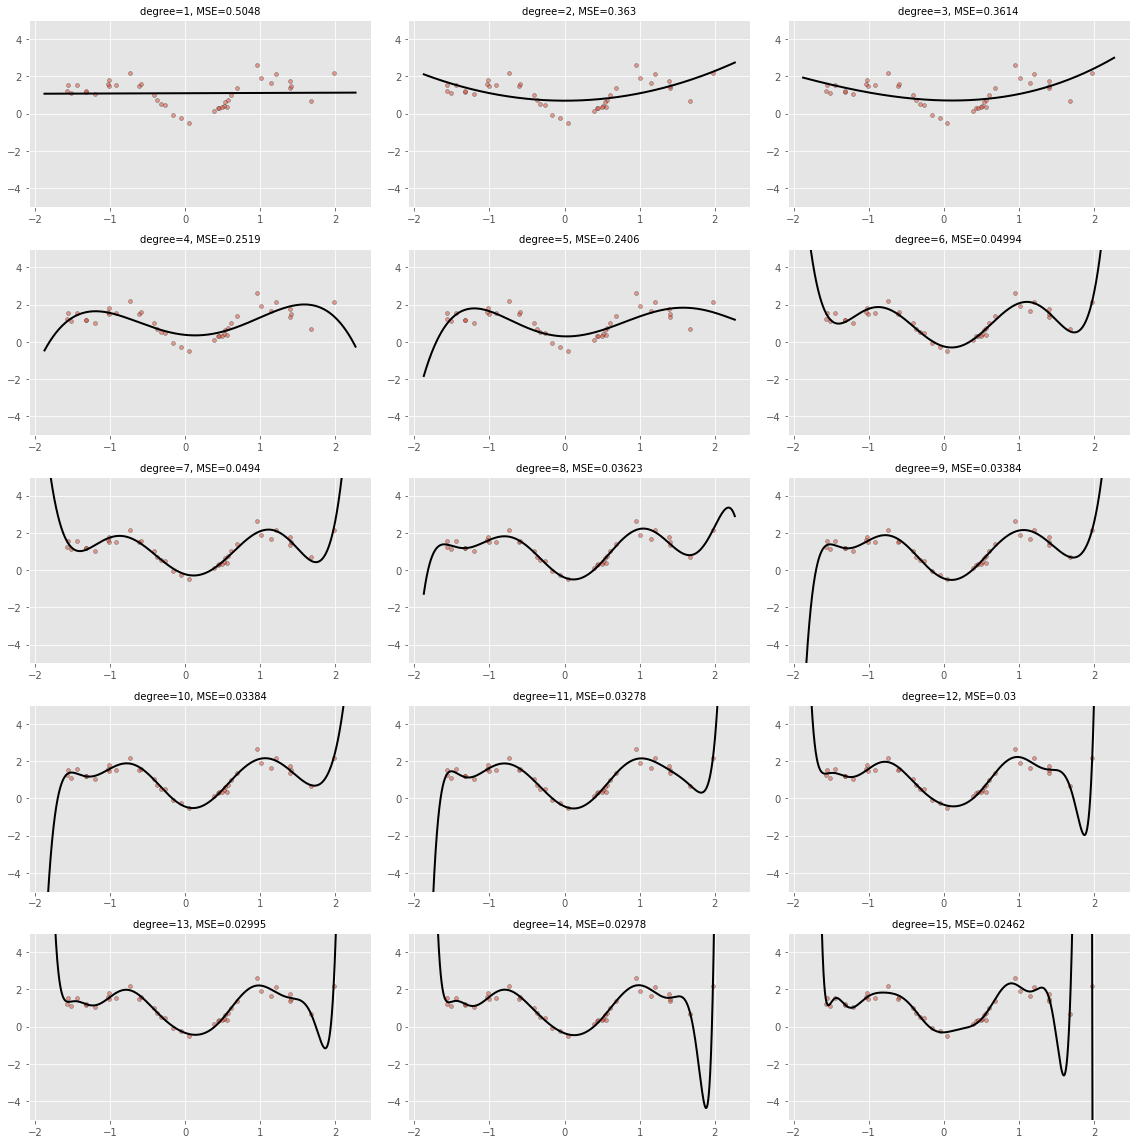

In [8]:
plt.figure(figsize=(16, 16))

empiricals = []
trues = []

for degree in range(1, 16):
    w = linear_regression(X_train, y_train, degree)
    # Plot Data And Model
    plt.subplot(5, 3, degree)
    plt.tight_layout()
    plt.ylim((-5, 5))

    X_train_X = add_polynomial_features(X_train, degree)
    X_valid_X = add_polynomial_features(X_valid, degree)
    # Predict
    X_plot = scaler.transform(np.linspace(0, 10, 10000)[:, np.newaxis])
    X_plot = add_polynomial_features(X_plot.T, degree)
    y_plot = w.T @ X_plot
    # Training Samples
    plt.scatter(X_train, y_train, s=15, edgecolor='k', alpha=0.5, label="Samples")
    # Predicted 
    plt.plot(X_plot[1, :], y_plot[0, :], 'k', lw=2, label="Predicted")
    empirical_loss = mse(y_train, w.T @ X_train_X)
    true_loss = mse(y_valid, w.T @ X_valid_X)
    empiricals.append(empirical_loss)
    trues.append(true_loss)
    plt.title("degree={}, MSE={:.4}".format(degree, empirical_loss), fontsize=10)

plt.show()


#### Empirical and True Loss

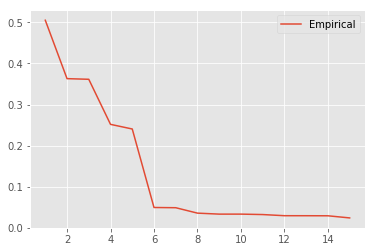

In [9]:
plt.plot(range(1, 16), empiricals, label='Empirical')
plt.legend()
plt.show()


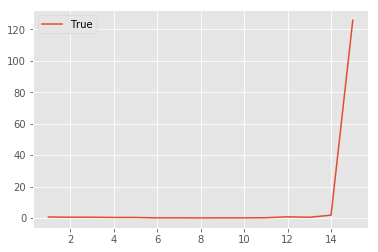

In [10]:
plt.plot(range(1, 16), trues, label='True')
plt.legend()
plt.show()


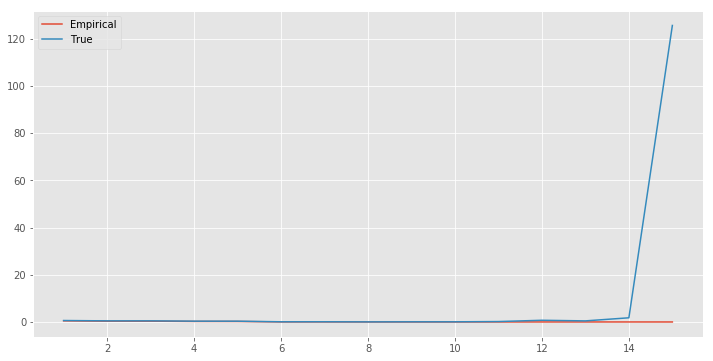

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 16), empiricals, label='Empirical')
plt.plot(range(1, 16), trues, label='True')
plt.legend()
plt.show()


In [12]:
np.argmin(trues)

7

#### With scikit-learn

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X_train = X_train.T
y_train = y_train.T


In [14]:
def fit_polynomial(X, y, degree=1):
    # Add polynomial features
    polynomial_features = PolynomialFeatures(degree=degree)
    # Create and fit the model
    linear_regression = LinearRegression()
    model = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
    model.fit(X, y)
    return model


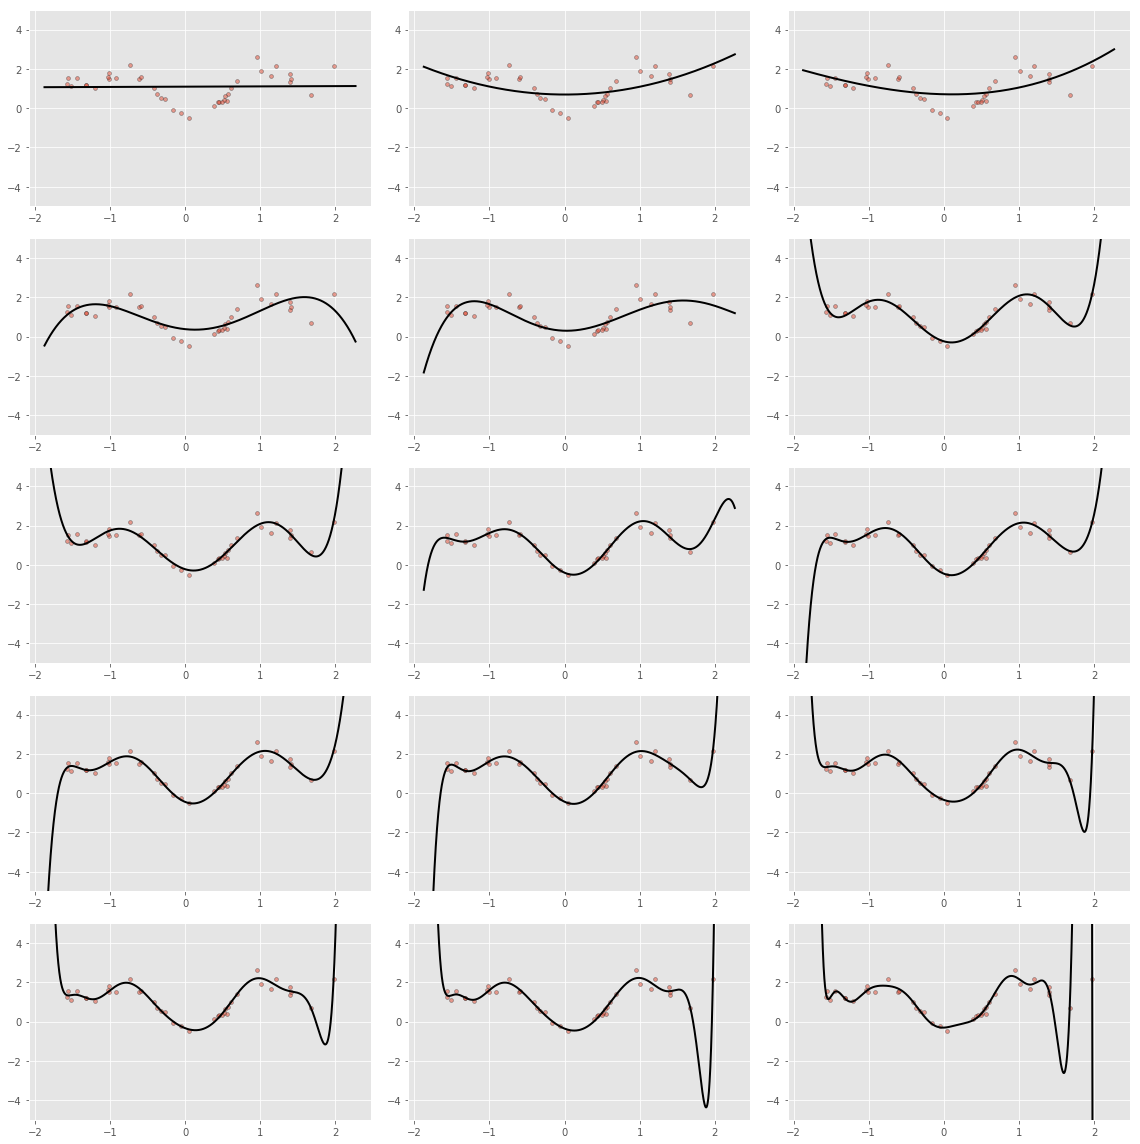

In [15]:
degrees = range(1, 16)
plt.figure(figsize=(16, 16))

for degree in degrees:
    model = fit_polynomial(X_train, y_train, degree=degree)
    # Plot Data And Model
    plt.subplot(5, 3, degree)
    plt.tight_layout()
    plt.ylim((-5, 5))
    # Training Samples
    plt.scatter(X_train, y_train, s=15, edgecolor='k', alpha=0.5, label="Samples")
    # Predicted 
    X_plot = scaler.transform(np.linspace(0, 10, 10000)[:, np.newaxis])
    plt.plot(X_plot, model.predict(X_plot), 'k', lw=2, label="Predicted")

plt.show()
